In [26]:
from PIL import Image, ImageOps, ImageFilter
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

(771, 1080) RGB


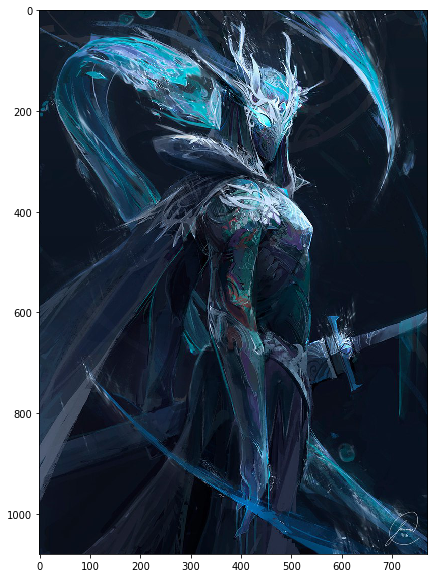

In [2]:
im1 = Image.open("D:/Images/Warriror.jpg")
print(im1.size, im1.mode)
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(im1)

(771, 1080) L


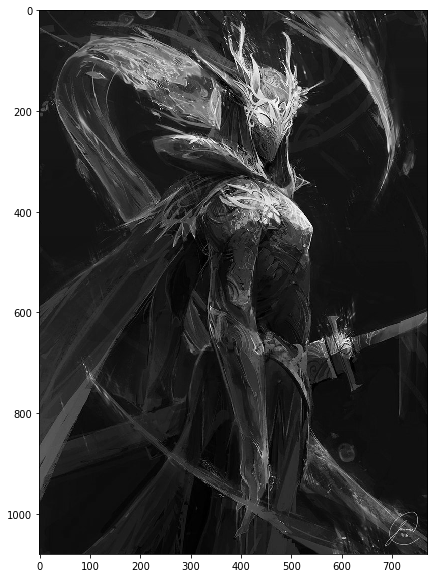

In [3]:
im2 = Image.open("D:/Images/Warriror.jpg")
im2 = ImageOps.grayscale(im2)
print(im2.size, im2.mode)
im2.save("d:/Images/Gray_image.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100))
plt.imshow(im2, cmap='gray')

In [4]:
colors = ['red', "green", 'blue']
def show_hists(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    fig, xy = plt.subplots(1, 3, figsize=(15,5), sharex = True, sharey = True)
    for num, channel in enumerate(image.split()):
        ch_data = np.bincount(np.array(channel.getdata()))
        if(ch_data.shape[0]<256):
            ch_data = np.append(ch_data, [0] * (256 - ch_data.shape[0]))
        if overflow:
            ch_data[255] = 0
        xy[num].set_ylim(top=25000)
        xy[num].bar(len_hist, ch_data, color = colors[num])
        xy[num].title.set_text(name)
    plt.show()
    
def show_hist(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    gr = np.bincount(np.array(image.getdata()))
    if(gr.shape[0]<256):
        gr = np.append(gr, [0] * (256 - gr.shape[0]))
    if overflow:
        gr[255] = 0
    plt.figure(figsize=(8,5))
    plt.bar(len_hist, gr, color = 'gray')
    plt.title(name)
    plt.show()

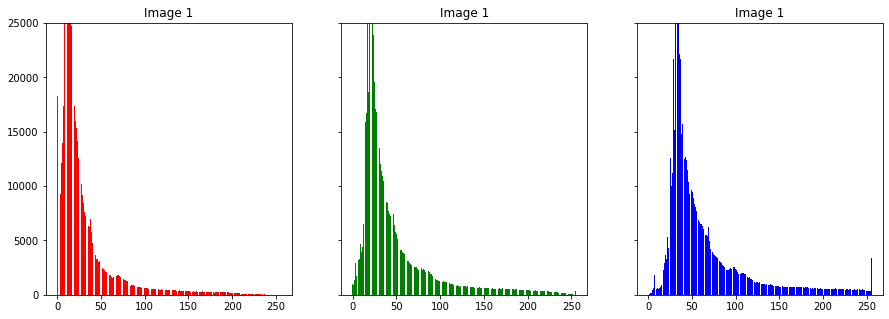

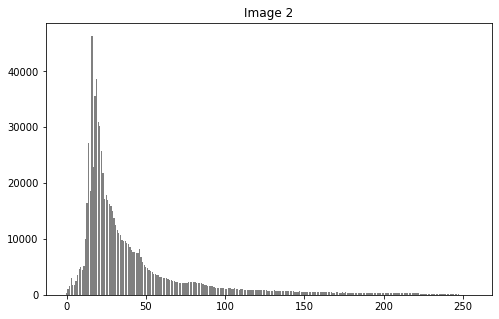

In [5]:
show_hists('Image 1', im1)
show_hist('Image 2', im2)

In [55]:
def use_median_filter(f_image, kernel_size=3, set_noise_percent=0):
    image = np.array(f_image)
    new_image = np.zeros(image.shape)
    
    if kernel_size%2 and kernel_size:
        padding = kernel_size//2
    else:
        raise Exception("Not correct kernel size")
        
    if set_noise_percent>0:
        if len(image.shape)==3:
            # (при сдаче комменты лучше стереть)
            # что происходит: если указан параметр шума, то делаем белые пиксели
            # сначала получаем случайные индексы белых пикселей, функцию np.random.choice лучше загуглить
            n_noise_places = image.shape[0]*image.shape[1]
            noise_places = np.random.choice(n_noise_places, n_noise_places*set_noise_percent//100, replace=False) 
            # изменяем размерность массива, чтобы применить индексы ко всем трём каналам цвета, затем возвращаем размерность
            image = image.reshape((-1,3))
            image[noise_places] = 255
            image = image.reshape(new_image.shape)
            # отображаем "испорченную" картинку
            plt.figure(figsize=(image.shape[0]//100, image.shape[1]//100 ))
            plt.imshow(image)
        else:
            noise_places = np.random.choice(image.size, image.size*set_noise_percent//100, replace=False)
            image = image.flatten()
            image[noise_places] = 255
            image = image.reshape(new_image.shape)
            plt.figure(figsize=(image.shape[0]//100, image.shape[1]//100 ))
            plt.imshow(image, cmap='gray')
                    
    if len(image.shape)==3:
        pad_image = np.pad(image, ((padding, padding),(padding, padding),(0,0)), 'edge')
        for z in range(pad_image.shape[2]):
            for i in range(pad_image.shape[0]-kernel_size+1):
                for j in range(pad_image.shape[1]-kernel_size+1):
                    new_image[i, j, z] = np.median(pad_image[i:i+kernel_size, j:j+kernel_size, z])
    elif len(image.shape)==2:
        pad_image = np.pad(image, ((padding, padding),(padding, padding)), 'edge')
        for i in range(pad_image.shape[0]-kernel_size+1):
            for j in range(pad_image.shape[1]-kernel_size+1):
                    new_image[i, j] = np.median(pad_image[i:i+kernel_size, j:j+kernel_size])
    return Image.fromarray(new_image.astype('uint8'))

In [12]:
def use_harmonic_filter(f_image):
    image = np.array(f_image)
    new_image = np.zeros(image.shape)
    if len(image.shape)==3:
        pad_image = np.pad(image, ((1,1),(1,1), (0,0)), 'edge')
        for z in range(pad_image.shape[2]):
            for i in range(pad_image.shape[0]-2):
                for j in range(pad_image.shape[1]-2):
                    new_image[i, j, z] = 9 // np.sum(1 / pad_image[i:i+3, j:j+3, z])
    elif len(image.shape)==2:
        pad_image = np.pad(image, ((1,1),(1,1)), 'edge')
        for i in range(pad_image.shape[0]-2):
            for j in range(pad_image.shape[1]-2):
                    new_image[i, j] = 9 // np.sum(1 / pad_image[i:i+3, j:j+3])
    return Image.fromarray(new_image.astype('uint8'))

Wall time: 5min 15s


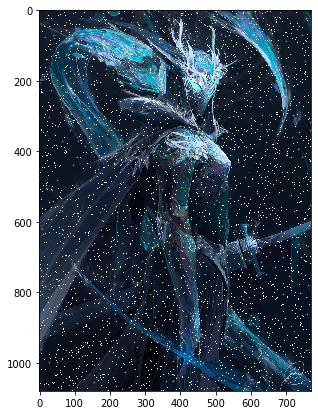

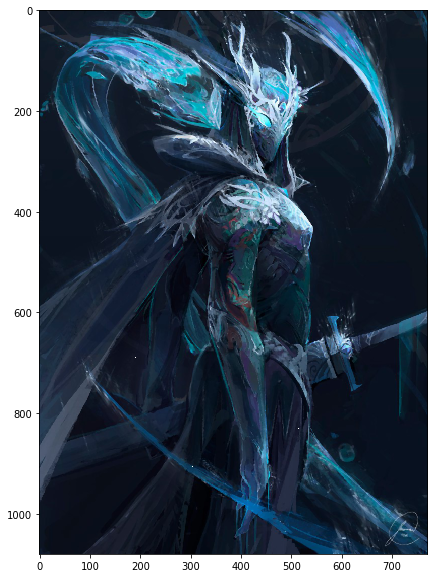

In [59]:
%%time
f_im1 = use_median_filter(im1, 3, 3)
f_im1.save("d:/Images/Image_color_F.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(f_im1)

Wall time: 1min 45s


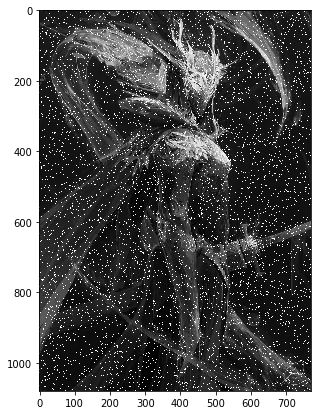

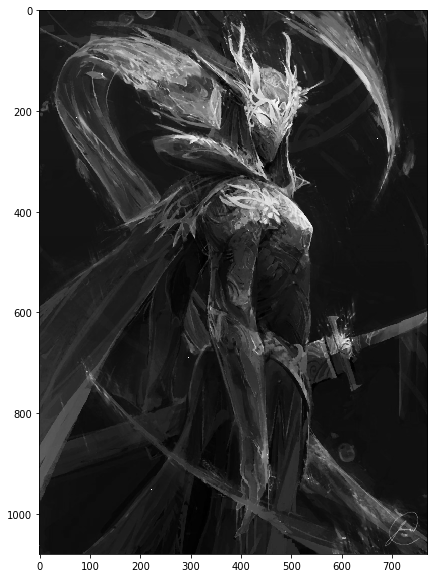

In [56]:
%%time
f_im2 = use_median_filter(im2, 3, 5)
f_im2.save("d:/Images/Image_gray_f.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(f_im2, cmap='gray')

In [14]:
def use_preparation(image):
    return Image.eval(image, lambda px: 255-px)

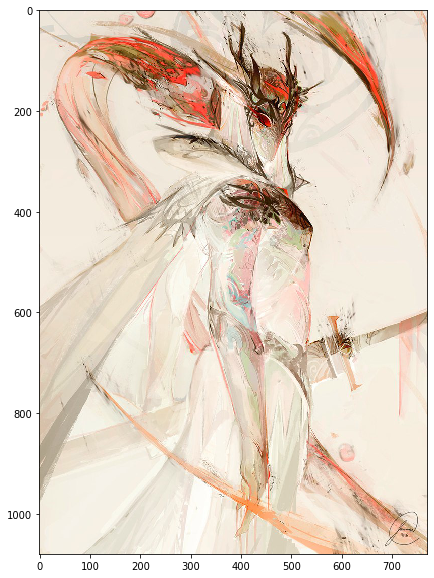

In [15]:
c_im1 = use_preparation(im1)
c_im1.save("d:/Images/Image_color_C.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(c_im1)

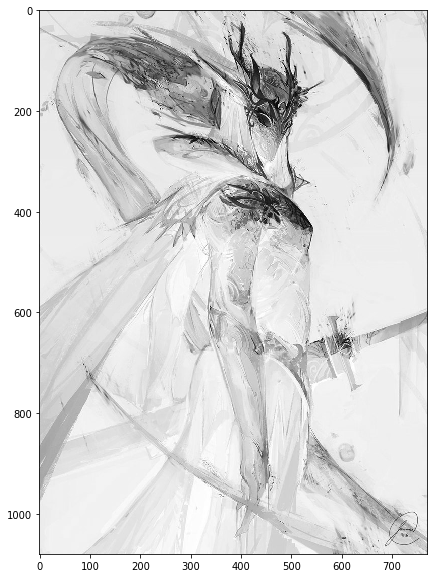

In [16]:
c_im2 = use_preparation(im2)
c_im2.save("d:/Images/Image_gray_C.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(c_im2, cmap='gray')

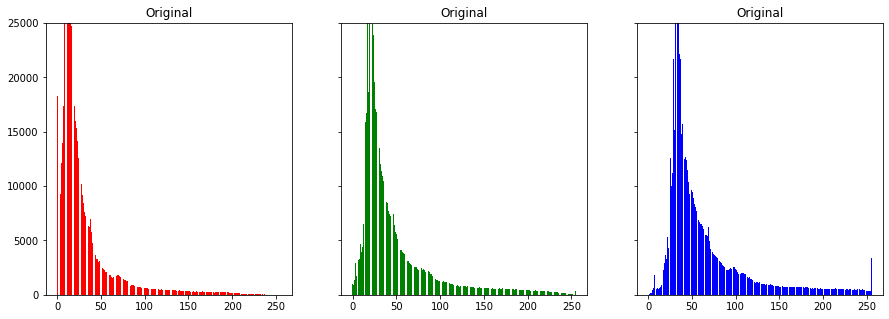

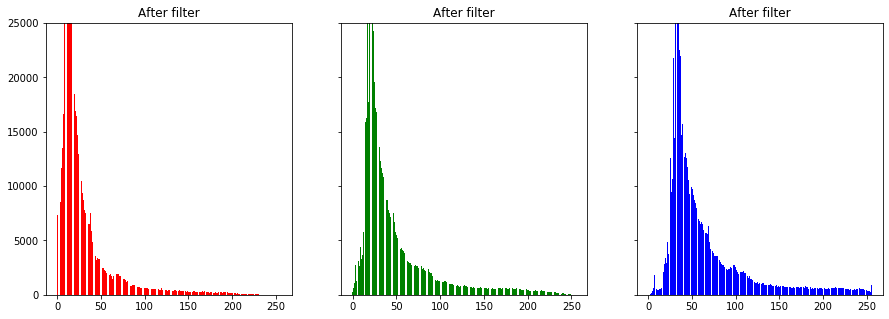

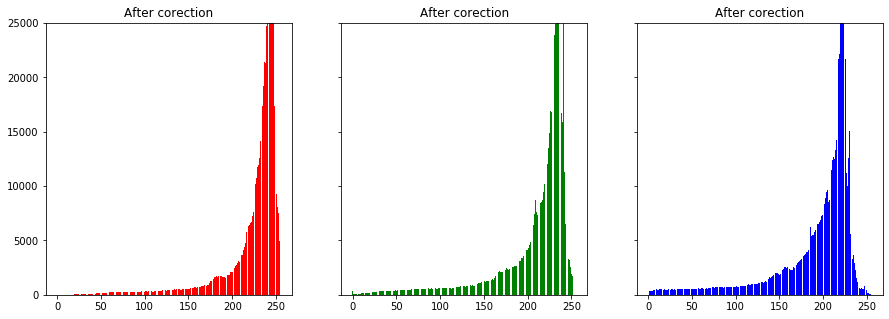

In [60]:
show_hists('Original', im1)
show_hists('After filter', f_im1)
show_hists('After corection', c_im1, overflow = True)

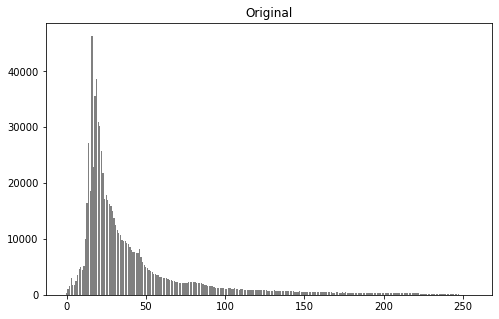

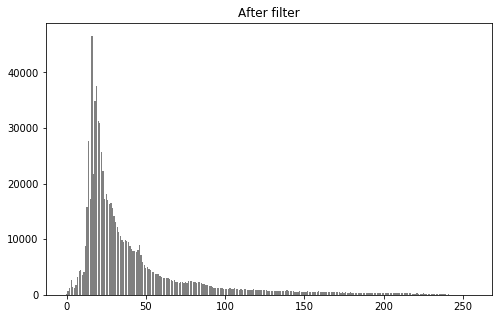

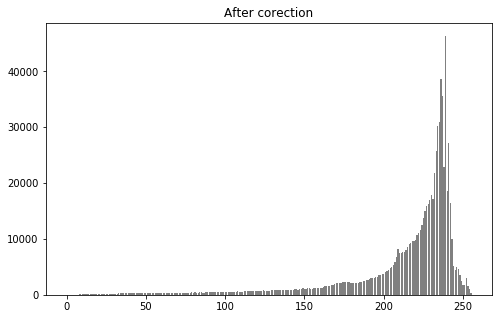

In [61]:
show_hist('Original', im2)
show_hist('After filter', f_im2)
show_hist('After corection', c_im2)